# Contenido

- [PCA](#PCA)
    - [Media de un Data set o valor esperado](#Media-de-un-Data-set-o-valor-esperado)
    - [Varianza de un Data set](#Varianza-de-un-Data-set)
    - [Producto punto y proyección en un subespacio](#Producto-punto-y-proyección-en-un-subespacio)
    - [Proyección ortogonal en múltiples dimensiones](#Proyección-ortogonal-en-múltiples-dimensiones)
    - [La idea detrás de PCA](#La-idea-detrás-de-PCA)
    
    
- [Ejemplo: Iris Data Set](#Ejemplo:-Iris-Data-Set)


- [Ejercicio](#Ejercicio)

## PCA 


El análisis de componentes principales es una técnica utilizada para describir un conjunto de datos en términos de nuevas variables (`componentes`) no correlacionadas. Los componentes se ordenan por la cantidad de varianza original que describen, por lo que la técnica es útil para reducir la dimensionalidad de un conjunto de datos.


Vamos a construir poco a poco la idea detrás del PCA.

[Regresar al contenido](#Contenido)

### Media de un Data set o valor esperado


Este es un concepto equivalente a la media aritmética, pero extendido a conjuntos de vectores, cuando pensemos en un data set (DataFrame), podemos pensar que es un conjunto de vectores, en el que cada vector es una observación individual, simplemente diremos que si tenemos un data set $D$, formado por n vectores $\vec{x}$ en $\mathbb{R}^d$, la media del data set, o el _valor esperado_ será:


$$E[D] = \frac{1}{n} \sum_{i= 1}^n \vec{x_i}$$


Cabe destacar que el valor esperado de $D$ no necesariamente es un punto dentro de $D$.

In [163]:
import numpy as np

In [164]:
m = np.random.randint(1, 15, (30, 3))

In [165]:
m

array([[13,  9, 11],
       [ 5,  9, 11],
       [11, 11,  7],
       [ 9,  3,  1],
       [ 5,  7,  2],
       [ 8,  8,  4],
       [ 4,  4,  2],
       [ 5, 11,  5],
       [ 7, 14,  3],
       [13, 11, 12],
       [12,  1,  3],
       [ 9,  2,  2],
       [ 5,  9, 10],
       [ 2,  8,  3],
       [12,  9, 10],
       [13, 10,  8],
       [ 9,  5,  1],
       [ 2,  9,  6],
       [ 7, 14, 11],
       [ 3,  4,  8],
       [ 9, 13, 12],
       [ 3,  9,  4],
       [ 9, 10,  1],
       [ 7,  4, 13],
       [ 9,  2,  3],
       [ 4,  3,  8],
       [ 9,  8, 10],
       [ 1,  6,  5],
       [ 4,  9, 10],
       [11,  9,  2]])

In [166]:
mu = np.zeros(3)

In [167]:
mu

array([0., 0., 0.])

In [168]:
for vec in m:
    mu += vec

In [169]:
m.shape[0]

30

In [170]:
mu /= m.shape[0]

In [171]:
mu

array([7.33333333, 7.7       , 6.26666667])

In [172]:
m.mean(axis = 0)

array([7.33333333, 7.7       , 6.26666667])

In [173]:
m.mean(axis = 1);

In [174]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

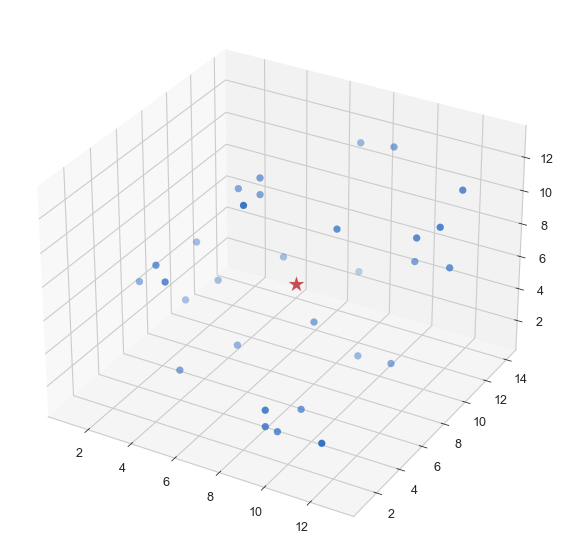

In [175]:
fig, ax = plt.subplots(subplot_kw = {'projection' : '3d'}, figsize = (10, 10))

ax.scatter3D(m[:, 0], m[:, 1], m[:, 2], s = 50)

ax.scatter3D(mu[0], mu[1], mu[2], color = 'r', s = 250, marker = '*');

[Regresar al contenido](#Contenido)

### Varianza de un Data set


Anterior mente habíamos hablado de la varianza como una medida que nos permite hacernos una idea de que tan dispersos están los datos, notemos que podemos tener dos data set $D_1$ y $D_2$ con la misma media:

$$D_1 = {1, 2, 4, 5}$$

$$D_2 = {-1, 7, 3}$$

Note que $E[D_1] = E[D_2] = 3$, en principio la media no nos ayuda a poder diferenciar estos dos data sets, y para poder hacernos una idea de en que se diferencian vamos a observar la varianza. Para este caso unidimensional tenemos que:

$$var[D] = \frac{1}{n} \sum_{i= 1}^n (x_i - \mu)^2$$



$$foo[D] = \frac{1}{n} \sum_{i= 1}^n (x_i - \mu)$$


$$foo[D] = \frac{1}{n} (\sum_{i= 1}^nx_i - \sum_{i= 1}^n\mu)$$

$$foo[D] = \frac{1}{n} \sum_{i= 1}^nx_i -  \frac{1}{n} \sum_{i= 1}^n\mu$$

$$foo[D] = \mu - \mu = 0$$

Donde $\mu = E[D]$, con esta definición tenemos que $var[D_1] = \frac{10}{11}$ y $var[D_2] = \frac{32}{3}$. Una varianza mayor nos indica que los elementos del data set están menos concentrados alrededor de la media, están más dispersos. Ahora extenderemos esta definición a dimensiones más altas. El primer problema que encontramos es que no hay algo como _vectores cuadrados_ por lo que la definición anterior queda obsoleta. Para poder dar una definición útil rescataremos el concepto de covarianza:

$$cov[x, y] = \frac{1}{n} \sum_{i= 1}^n (x_i - \mu_x)(y_i - \mu_y) = E[(x - \mu_x)(y - \mu_y)]$$


Donde $\mu_x = E[x]$ y $\mu_y = E[y]$. Como habíamos mencionado antes la varianza de $x$ puede ser entendida como $cov[x, x]$. Una vez rescatado este concepto definiremos la _matriz de covarianza_

Sea $D$ un vector aleatorio formado por $d$ variables aleatorias $C_1, \cdots, C_d$ y que forman a nuestro data set $X_1, \cdots, X_n$, la matriz de covarianza de $D$ como:

$$var[D] = E[(D - \mu)^T(D - \mu)]$$

Que es una matriz simétrica de valores reales (no todos positivos) que tiene el siguiente aspecto:


$$
\begin{bmatrix}
var[C_1] & cov[C_1, C_2] & \cdots & cov[C_1, C_d]\\
cov[C_2, C_1] & var[C_2] & \cdots & cov[C_2, C_d]\\
\vdots & \vdots & \cdots & \vdots\\
cov[C_d, C_1] & cov[C_d, C_2] & \cdots & var[C_d]\\
\end{bmatrix}
$$

In [176]:
import pandas as pd
import seaborn as sns
from sympy import *

In [177]:
planets = sns.load_dataset('planets')

In [178]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [179]:
planets.tail()

,method,number,orbital_period,mass,distance,year
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008
1034,Transit,1,4.187757,NaN,260.0,2008


In [180]:
planets.shape

(1035, 6)

In [181]:
help(planets.cov)

Help on method cov in module pandas.core.frame:

cov(min_periods: 'int | None' = None, ddof: 'int | None' = 1) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Compute pairwise covariance of columns, excluding NA/null values.
    
    Compute the pairwise covariance among the series of a DataFrame.
    The returned data frame is the `covariance matrix
    <https://en.wikipedia.org/wiki/Covariance_matrix>`__ of the columns
    of the DataFrame.
    
    Both NA and null values are automatically excluded from the
    calculation. (See the note below about bias from missing values.)
    A threshold can be set for the minimum number of
    observations for each value created. Comparisons with observations
    below this threshold will be returned as ``NaN``.
    
    This method is generally used for the analysis of time series data to
    understand the relationship between different measures
    across time.
    
    Parameters
    ----------
    min_periods : int, optio

In [182]:
planets[['orbital_period', 'mass', 'distance']].cov()

,orbital_period,mass,distance
orbital_period,6.767661e+08,1005.472594,-255305.071038
mass,1.005473e+03,14.581833,46.439431
distance,-2.553051e+05,46.439431,537459.792221


In [183]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [184]:
planets['mass'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0        7.10
1        2.21
2        2.60
3       19.40
4       10.50
        ...  
1030      NaN
1031      NaN
1032      NaN
1033      NaN
1034      NaN
Name: mass, Length: 1035, dtype: float64>

In [185]:
a = np.array([1, 2, 3, 4, 5, np.nan, np.nan])

In [186]:
a.mean()

nan

In [187]:
s = pd.Series(a)

In [188]:
s

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    NaN
6    NaN
dtype: float64

In [189]:
s.fillna(0).mean()

2.142857142857143

In [190]:
Matrix(planets[['orbital_period', 'mass', 'distance']].cov())

Matrix([
[ 676766088.734191, 1005.47259444658, -255305.071037532],
[ 1005.47259444658, 14.5818331270012,  46.4394306783416],
[-255305.071037532, 46.4394306783416,  537459.792221293]])

In [191]:
planets[['orbital_period', 'mass', 'distance']].cov().values

array([[ 6.76766089e+08,  1.00547259e+03, -2.55305071e+05],
       [ 1.00547259e+03,  1.45818331e+01,  4.64394307e+01],
       [-2.55305071e+05,  4.64394307e+01,  5.37459792e+05]])

In [192]:
np.cov(planets[['orbital_period', 'mass', 'distance']].values.T)

array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan]])

In [193]:
planets['method'].unique()

array(['Radial Velocity', 'Imaging', 'Eclipse Timing Variations',
       'Transit', 'Astrometry', 'Transit Timing Variations',
       'Orbital Brightness Modulation', 'Microlensing', 'Pulsar Timing',
       'Pulsation Timing Variations'], dtype=object)

In [194]:
mask = planets['method'] == 'Transit'
planets[mask]

,method,number,orbital_period,mass,distance,year
91,Transit,1,1.508956,NaN,NaN,2008
92,Transit,1,1.742994,NaN,200.0,2008
93,Transit,1,4.256800,NaN,680.0,2008
94,Transit,1,9.202050,NaN,NaN,2008
95,Transit,1,4.037896,NaN,NaN,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.0,2006
1031,Transit,1,2.615864,NaN,148.0,2007
1032,Transit,1,3.191524,NaN,174.0,2007
1033,Transit,1,4.125083,NaN,293.0,2008


In [195]:
?np.random.seed

In [196]:
np.random.seed = 15
np.random.random(3)

array([0.35398594, 0.62719392, 0.73992668])

In [197]:
planets.sample(30)

,method,number,orbital_period,mass,distance,year
510,Radial Velocity,2,12.620000,1.1300,68.59,2013
898,Transit,1,1.720861,NaN,1056.00,2014
997,Transit,1,2.423804,NaN,NaN,2011
655,Transit,1,3.548460,NaN,NaN,2009
894,Transit,1,2.465020,NaN,NaN,2014
459,Radial Velocity,1,1840.000000,1.6000,67.61,2009
323,Radial Velocity,1,472.000000,0.5800,50.43,2010
244,Radial Velocity,2,1708.000000,1.9200,37.16,2002
1030,Transit,1,3.941507,NaN,172.00,2006
481,Radial Velocity,1,386.300000,1.6200,34.57,2003


Esta matriz de covarianza es la extensión de la varianza para el caso multidimensional, y nos será de utilidad más adelante.

[Regresar al contenido](#Contenido)

### Producto punto y proyección en un subespacio


Recordemos el producto punto entre vectores rápidamente.

$$ X \cdot Y = X^T Y = \sum x_i y_i$$

Una aplicación que vimos anteriormente del producto punto es el de proyectar un vector $\vec{a}$ en un subespacio $\mathcal{L}$


<img src="Proyeccion ortogonal.png" width = 400 height = 400> 



Supongamos que tenemos un vector $\vec{b}$ que genera un subespacio $\mathcal{L}$, y tenemos un vector $\vec{a}$ que no pertenece a $\mathcal{L}$, entonces podemos hallar la proyección $\pi_{\mathcal{L}} (\vec{a})$. Esta proyección debe cumplir las siguientes dos propiedades.



- $\pi_{\mathcal{L}} (\vec{a}) \in \mathcal{L}$, es decir, existe un escalar $\lambda$ tal que $\pi_u (\vec{a}) = \lambda \vec{b}$
- $\vec{b}  \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = 0$


Analicemos un poco que pasa con la segunda condición para poder deducir quien es nuestra proyección. Tenemos:


$$\vec{b}  \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = \vec{b} \cdot \pi_{\mathcal{L}} (\vec{a}) - \vec{b} \cdot \vec{a} = \vec{b} \cdot \lambda \vec{b} - \vec{b} \cdot \vec{a} = 0$$
$$\lambda ||\vec{b}||^2 = \vec{b} \cdot \vec{a}$$
$$\lambda = \frac{\vec{b} \cdot \vec{a}}{||\vec{b}||^2}$$

A $\lambda$ se le conoce como la coordenada de $\pi_{\mathcal{L}} (\vec{a})$ en la base $\{\vec{b}\}$. una vez que ya identificamos $\lambda$ podemos escribir la proyección como:

$$\pi_{\mathcal{L}} (\vec{a}) = \lambda \vec{b} = \frac{\vec{b} \cdot \vec{a}}{||\vec{b}||^2} \vec{b} = \frac{b b^T}{||b||^2}a$$


Donde a $\frac{b b^T}{||b||^2}$ la llamaremos matriz de proyección. Que cumple ser cuadrada y simétrica. Veamos un ejemplo en 2 dimensiones. Suponga que:


$$
b = 
\begin{bmatrix}
b_1\\
b_2\\
\end{bmatrix}
$$

Entonces:

$$
bb^T = 
\begin{bmatrix}
b_1\\
b_2\\
\end{bmatrix}
\begin{bmatrix}
b_1 & b_2\\
\end{bmatrix}
=
\begin{bmatrix}
b_1^2  & b_1 b_2\\
b_1 b_2  & b_2^2\\
\end{bmatrix}
$$



In [198]:
a = np.array([-6, 7])
b = np.array([-1, -2])

In [199]:
scalar = np.linspace(-3, 3, 1000)

In [200]:
x, y = [], []

In [201]:
for t in scalar:
    x.append((b * t)[0])
    y.append((b * t)[1])

In [202]:
x = np.array(x)
y = np.array(y)

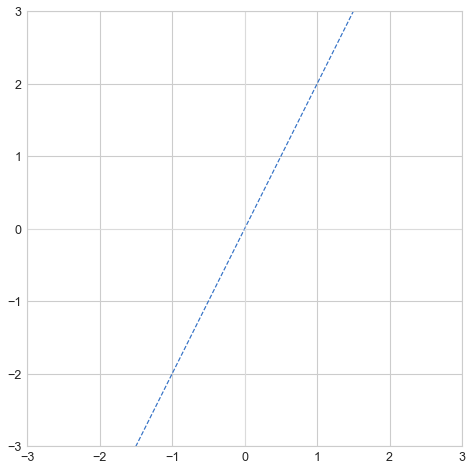

In [203]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.quiver([0, 0], [0, 0], [a[0], b[0]], [a[1], b[1]], color = 'w', scale = 15)
ax.plot(x, y, linestyle = '--')
ax.set_aspect("equal")
ax.axvline(0, color = 'w', alpha = 0.3)
ax.axhline(0, color = 'w', alpha = 0.3)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3]);

In [204]:
b == b.T

array([ True,  True])

In [205]:
b

array([-1, -2])

In [206]:
b2 = b.copy()

In [207]:
b2 = b2.reshape((2, 1))

In [208]:
m = (b2 @ b2.T) / (b.dot(b))

In [209]:
m

array([[0.2, 0.4],
       [0.4, 0.8]])

In [210]:
pa = m @ a

In [211]:
pa

array([1.6, 3.2])

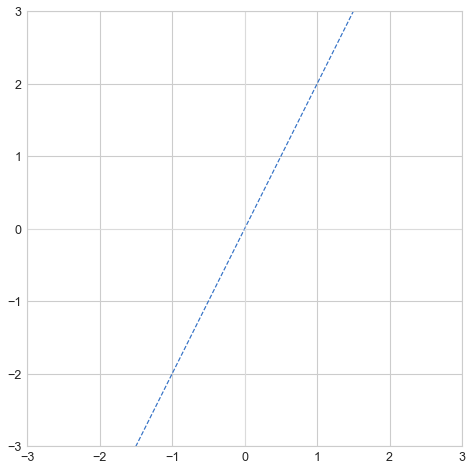

In [212]:
fig, ax = plt.subplots(figsize = (8, 8))

ax.quiver([0, 0, 0], [0, 0, 0], [a[0], b[0], pa[0]], [a[1], b[1], pa[1]], color = 'w', scale = 15)
ax.plot(x, y, linestyle = '--')
ax.set_aspect("equal")
ax.axvline(0, color = 'w', alpha = 0.3)
ax.axhline(0, color = 'w', alpha = 0.3)
ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3]);

[Regresar al contenido](#Contenido)

### Proyección ortogonal en múltiples dimensiones


Imaginemos que ahora el subespacio $\mathcal{L}$ tiene una base de más de un elemento, pongamos como ejemplo el caso en el que $\mathcal{L}$ es un plano en el espacio



<img src="Proyección ortogonal 2D.png" width = 400 height = 400> 


en este caso la base de $\mathcal{L}$ estará formada por dos vectores $\{\vec{b_1}, \vec{b_2}\}$, la proyección $\pi_{\mathcal{L}} (\vec{a})$ sera un vector en $\mathcal{L}$, es decir que se puede escribir como una combinación lineal de $\vec{b_1}$ y $\vec{b_2}$. En general si la base de $\mathcal{L}$ está formada por $n$ vectores $\vec{b_i}$ tenemos que $\pi_{\mathcal{L}} (\vec{a})$ cumplirá que:


- $\pi_{\mathcal{L}} (\vec{a}) = \sum_{i = 1}^{n} \lambda_i \vec{b_i}$
- $b_i \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = 0$, para todo $i = 1, \cdots, n$


No te que si llamamos simplemente $\lambda$ al vector que contiene a todos los $\lambda_i$ y $B$ a la matriz que tiene por columnas los vectores de la base $\vec{b_i}$, podemos escribir la primera propiedad como:

$$\pi_{\mathcal{L}} (\vec{a}) = B \lambda$$

De esta forma tenemos (recordando que $(AB)^T = B^TA^T$):

$$\vec{b_i} \cdot (\pi_{\mathcal{L}} (\vec{a}) - \vec{a}) = \vec{b_i} \cdot (B \lambda - \vec{a}) =  \vec{b_i} \cdot B \lambda - \vec{b_i} \cdot \vec{a} = 0$$
$$\vec{b_i} \cdot B \lambda = \vec{b_i} \cdot \vec{a}$$
$$b_i^T B \lambda = b_i^T \vec{a}$$
$$\lambda^T B^T b_i = a^T b_i$$
$$\lambda^T B^T B = a^T B$$
$$\lambda^T = a^T B (B^TB)^{-1}$$
$$\lambda = (B^TB)^{-1}B^T a $$

Hay que notar que $(B^TB)^{-1}$ es simétrica, y por tanto igual a su transpuesta. veámoslo con un ejemplo de dos vectores $b$ y $v$:

$$
\begin{bmatrix}
b_1  & b_2\\
v_1  & v_2\\
\end{bmatrix}
\begin{bmatrix}
b_1  & v_1\\
b_2  & v_2\\
\end{bmatrix}
=
\begin{bmatrix}
b \cdot b  & b \cdot v\\
v \cdot b  & v \cdot v\\
\end{bmatrix}
$$



Ahora $\lambda$ es el vector de coordenadas de $\pi_{\mathcal{L}} (\vec{a})$ en la base $\{ b_1, b_2\}$, y podemos escribir:

$$\pi_{\mathcal{L}} (\vec{a}) = B \lambda = B (B^TB)^{-1}B^T a$$

Donde $B (B^TB)^{-1}B^T$ es la matriz de proyección, nos interesa destacar un caso particular, y es en el que $b_1$, $b_2$ forman una base ortonormal, en ese caso $(B^TB)^{-1} = I$ y podemos simplificar la proyección:

$$\pi_u (X) = B \lambda = BB^T X$$


[Regresar al contenido](#Contenido)

### La idea detrás de PCA


La idea subyacente al aplicar PCA es la de buscar una aproximación de nuestros datos, en forma de proyección ortogonal de nuestros datos en un subespacio vectorial, la idea es hacerlo de forma óptima para perder la menor información posible, pero al mismo tiempo obteniendo una aproximación de nuestros con una dimensionalidad menor, es decir que necesitamos menos vectores para describirla.


<img src="Posibles proyecciones.gif" width = 600 height = 600> 
<img src="Proyección optima.gif" width = 600 height = 600> 


Ahora supongamos que tenemos un data set $X = \{X_1, \cdots, X_n\}$ con $X_i \in \mathbb{R}^d$. Cabe destacar que el modelo supone que $E[X] = 0$. Y suponga que se tiene una base $B = \{b_1, \cdots, b_d\}$, siendo una base ortonormal. Entonces cada $X_i$ puede ser escrito como:


$$X_i = \sum_{j = 1}^d \beta_{ji} b_j$$

Ahora vamos a generar dos subespacios de $\mathbb{R}^d$ dividiendo la base $B$ en dos conjuntos separados: $B_p = \{b_1, \cdots, b_m\}$ y $B_c = \{b_{m + 1}, \cdots, b_d\}$, en si mismas cada una nos representa un subespacio, al que llamaremos subespacio principal, y complementario respectivamente. Note también que $B_p$ y $B_c$ son ortonormales, y podemos reescribir la expresión anterior:




$$X_i = \sum_{j = 1}^m \beta_{ji} b_j + \sum_{j = m + 1}^d \beta_{ji} b_j$$


Lo que buscamos entonces es una proyección ortogonal de cada $X_i$ en $B_p$, es decir buscamos $\tilde{X}_i$ tal que:

$$\tilde{X}_i = B_p B_p^T X_i$$


Donde a $B_p^T X_i$ llamaremos las coordenadas de $\tilde{X}_i$ en el subespacio principal. Buscamos optimizar la función error $J$, que viene expresada de la siguiente forma:


$$J = \frac{1}{n} \sum_{i = 1}^{n} ||X_i - \tilde{X}_i||^2$$

Ahora noten que podemos escribir $X_i$ como: 


$$X_i = B_p B_p^T X_i + B_c B_c^T X_i$$


Entonces:

$$J = \frac{1}{n} \sum_{i = 1}^{n} ||X_i - \tilde{X}_i||^2 = \frac{1}{n} \sum_{i = 1}^{n} ||B_c B_c^T X_i||^2$$

$$B_c B_c^T \frac{1}{n} \sum_{i = 1}^{n} ||X_i||^2 = B_c B_c^T \frac{1}{n} \sum_{i = 1}^{n} X_i X_i^T$$

$$J = B_c B_c^T var[X]$$


Este resultado es muy potente y para poder entender porque, vamos a simplificar el caso, suponga que $B$ solo está formada por los vectores $b_1$, y $b_2$, $b_1$ generará el espacio principal, y $b_2$ el complementario. por lo que podemos simplificar $J$ como sigue:


$$J = b_2^T var[X] b_2$$

Y además se cumple que $b_2^T b_2 = 1$ ya que la base es ortonormal. Ahora podemos aplicar el método de los multiplicadores de Lagrange para optimizar $J$, no desarrollaremos todo el método solo nos fijaremos en lo siguiente:


$$\frac{\partial L}{\partial b_2} = b_2^T var[X] - \lambda b_2^T$$

$$b_2^T var[X] = \lambda b_2^T$$
$$var[X] b_2 = \lambda b_2$$


Es decir los vectores de la base son los vectores propios de $var[X]$ !!!!. 

<img src="impactado.gif" width = 600 height = 600> 


Además podemos escribir $J = \lambda$ por lo que optimizar $J$ se puede entender como tomar los vectores propios correspondientes a los valores propios de $var[X]$ más pequeños como base del subespacio complementario.


[Regresar al contenido](#Contenido)

# Ejemplo: Iris Data Set

A continuación mostraremos un ejemplo de PCA aplicado a un data set de 4 dimensiones, los pasos a elegir son los siguientes:


- Cargar los datos
- Normalizarlos
- Obtener los autovectores y autovalores a partir de la matriz de covarianza
- Seleccionar los autovectores correspondientes a las componentes principales
- Proyectar el dataset original sobre el nuevo espacio de dimensión < 4



Este dataset se usa como datos de entrenamiento para un modelo de machine learning cuyo objetivo es determinar de forma automática la especie a la que pertenece una determinada flor, a partir de las medidas 4 atributos o características. En particular, la longitud y la anchura de sus pétalos y sépalos expresadas en centímetros. Por tanto, se trata de un problema de 4 dimensiones, en el que la variable objetivo (target) es la especie. Los datos se pueden representar en forma de una matriz de 150 filas (los datos de cada flor), por 4 columnas (las medidas de sus pétalos/sépalos). La quinta, corresponde a la variable objetivo, la especie.


<img src="Iris data set.PNG" width = 600 height = 600> 

In [213]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

data = pd.read_csv(url, names = ['lng sepalo', 'anch sepalo', 'lng petalo', 'anch petalo', 'especie'])

In [214]:
data.head()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [215]:
X = data[['lng sepalo', 'anch sepalo', 'lng petalo', 'anch petalo']]

In [216]:
y = data['especie']

In [217]:
X.mean(axis = 0)

lng sepalo     5.843333
anch sepalo    3.054000
lng petalo     3.758667
anch petalo    1.198667
dtype: float64

Cuando las distintas características o atributos de un dataset están expresadas en distintas escalas se hace patente la necesidad de normalizar sus valores. En este caso, en el que las medidas de sépalos y pétalos están expresadas en centímetros, no sería imprescindible. Sin embargo, como ya comentamos en el post anterior (en forma de una de las limitaciones del PCA), al aplicar esta técnica se asume que los datos de trabajado tienen una distribución gaussiana o normal.  Por tanto, aplicamos a los datos una transformación de normalización de forma que su media sea igual a 0, y su varianza=1. Para ello, usaremos la transformación Standardscaler de sklearn.

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
scaler = StandardScaler()

In [220]:
X_std = scaler.fit_transform(X)

In [221]:
np.isclose(X_std.mean(axis = 0), 0)

array([ True,  True,  True,  True])

In [222]:
X_std.std(axis = 0)

array([1., 1., 1., 1.])

In [223]:
cov_m = np.cov(X_std.T)

In [224]:
vals, B = np.linalg.eig(cov_m)

In [225]:
vals

array([2.93035378, 0.92740362, 0.14834223, 0.02074601])

In [226]:
B

array([[ 0.52237162, -0.37231836, -0.72101681,  0.26199559],
       [-0.26335492, -0.92555649,  0.24203288, -0.12413481],
       [ 0.58125401, -0.02109478,  0.14089226, -0.80115427],
       [ 0.56561105, -0.06541577,  0.6338014 ,  0.52354627]])

In [227]:
eig_pairs = [(vals[i], B[:, i]) for i in range(len(vals))]

In [228]:
eig_pairs

[(2.930353775589316,
  array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])),
 (0.9274036215173429,
  array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])),
 (0.14834222648164,
  array([-0.72101681,  0.24203288,  0.14089226,  0.6338014 ])),
 (0.020746013995595815,
  array([ 0.26199559, -0.12413481, -0.80115427,  0.52354627]))]

In [229]:
tot = vals.sum()

In [230]:
sorted(vals, reverse = True)

[2.930353775589316, 0.9274036215173429, 0.14834222648164, 0.020746013995595815]

In [231]:
var_exp = [(val / tot) * 100 for val in sorted(vals, reverse = True)]

In [232]:
var_exp

[72.77045209380131, 23.03052326768067, 3.6838319576273912, 0.5151926808906291]

In [233]:
sum_var_exp = np.cumsum(var_exp)

In [234]:
sum_var_exp

array([ 72.77045209,  95.80097536,  99.48480732, 100.        ])

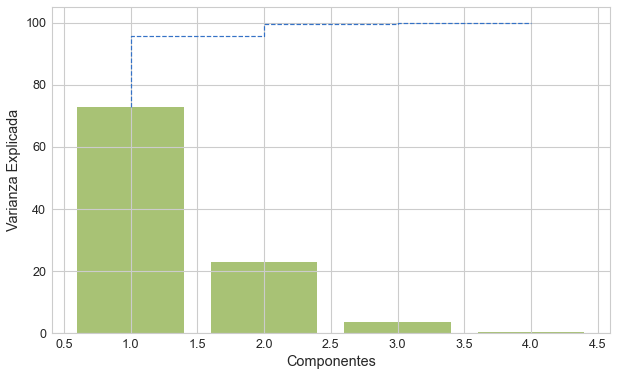

In [235]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.bar(np.arange(1, len(vals) + 1), var_exp, color = 'g', alpha = 0.7)
ax.step(np.arange(1, len(vals) + 1), sum_var_exp, linestyle = '--')
ax.set_xlabel('Componentes')
ax.set_ylabel('Varianza Explicada');

In [236]:
eig_pairs.sort(reverse=True)

In [237]:
eig_pairs[0][1]

array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105])

In [238]:
eig_pairs[1][1]

array([-0.37231836, -0.92555649, -0.02109478, -0.06541577])

In [239]:
B = np.column_stack([eig_pairs[0][1], eig_pairs[1][1]])

In [240]:
B

array([[ 0.52237162, -0.37231836],
       [-0.26335492, -0.92555649],
       [ 0.58125401, -0.02109478],
       [ 0.56561105, -0.06541577]])

In [241]:
M = B @ B.T

In [242]:
M @ X_std[0, :]

array([-0.99464948,  1.06443573, -1.30560624, -1.24776881])

In [243]:
M.shape

(4, 4)

In [244]:
X_std.shape

(150, 4)

In [245]:
pX_std = X_std @ M

In [246]:
%%timeit 
temp = []
for i in range(X_std.shape[0]):
    temp.append(M @ X_std[i, :])
    
temp = np.array(temp)

552 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [247]:
%timeit pX_std = X_std @ M

7.22 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [248]:
pX_std[0]

array([-0.99464948,  1.06443573, -1.30560624, -1.24776881])

$$\lambda = B^T a$$

In [249]:
B.T @ pX_std[1]

array([-2.0864255 ,  0.65540473])

In [250]:
B.T.shape, pX_std.T.shape

((2, 4), (4, 150))

In [251]:
pX_std.shape, B.shape

((150, 4), (4, 2))

In [252]:
newX = pX_std @ B

In [253]:
newX.shape

(150, 2)

In [254]:
newX = np.column_stack([newX, y])

In [255]:
colors = ['magenta', 'cyan', 'limegreen']

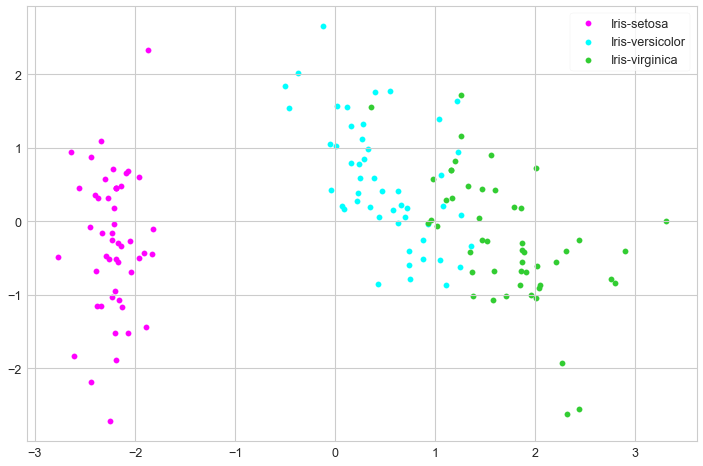

In [256]:
fig, ax = plt.subplots(figsize = (12, 8))

for f, c in zip(y.unique(), colors):
    mask = newX[:, 2] == f
    ax.scatter(newX[mask, 0], newX[mask, 1], color = c, label = f)
    
ax.legend();

In [257]:
newX

array([[-2.2645417283948994, -0.5057039027737839, 'Iris-setosa'],
       [-2.0864255006161576, 0.6554047293691379, 'Iris-setosa'],
       [-2.3679504490625254, 0.3184773108472505, 'Iris-setosa'],
       [-2.3041971611520085, 0.5753677125331966, 'Iris-setosa'],
       [-2.3887774935056414, -0.6747673967025146, 'Iris-setosa'],
       [-2.070536807180553, -1.5185485598885125, 'Iris-setosa'],
       [-2.445711339630283, -0.07456267500687279, 'Iris-setosa'],
       [-2.2338418587092654, -0.24761393175226398, 'Iris-setosa'],
       [-2.3419576764553893, 1.0951463625829567, 'Iris-setosa'],
       [-2.1886757552808693, 0.44862904833756045, 'Iris-setosa'],
       [-2.1634865562665224, -1.0705955760377257, 'Iris-setosa'],
       [-2.327377754134373, -0.15858745465947474, 'Iris-setosa'],
       [-2.2240827220450017, 0.7091181580302278, 'Iris-setosa'],
       [-2.6397162608446285, 0.9382819821078556, 'Iris-setosa'],
       [-2.192291508498429, -1.8899785123164652, 'Iris-setosa'],
       [-2.251465

In [258]:
data.cov()

,lng sepalo,anch sepalo,lng petalo,anch petalo
lng sepalo,0.685694,-0.039268,1.273682,0.516904
anch sepalo,-0.039268,0.188004,-0.321713,-0.117981
lng petalo,1.273682,-0.321713,3.113179,1.296387
anch petalo,0.516904,-0.117981,1.296387,0.582414


In [259]:
data.head()

,lng sepalo,anch sepalo,lng petalo,anch petalo,especie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Si lo que queremos es reducir la dimensionalidad del dataset, perdiendo la menor información posible, descartaremos los autovectores cuyos autovalores sean más bajos, ya que son aquellos que menos información aportan al conjunto global. Para ello, lo que se hace es ordenarlos por parejas de autovector, autovalor.

El objetivo de este caso es proyectar este dataset 4D en un espacio de menor dimensionalidad, para mejorar la eficiencia de cálculo, al mismo tiempo que se retiene la mayor parte de la información. La pregunta clave será ¿cuál va ser este valor? ¿3D?¿2D?¿1D?. Para ello seguiremos el siguiente proceso.

Una vez ordenados los autovalores, que recordamos son una medida de la varianza de los datos, la cuestión es decidir, cuál es el menor número de autovectores o componentes principales, con el que podemos expresar “la esencia principal” de la información contenida en ese dataset. Para ello, usaremos una métrica que se conoce como “varianza explicada”, que muestra cuánta varianza se puede atribuir a cada una de estas componentes principales.

En la gráfica se aprecia claramente que la mayor parte de la varianza (en torno al 70%) corresponde a la primera componente. La segunda acumula algo más del 20% de la varianza, mientras que la tercera puede ser descartada sin perder demasiada información, ya que las dos primeras componentes explican más del 90% de la varianza.

In [260]:
from sklearn.decomposition import PCA

In [261]:
X

,lng sepalo,anch sepalo,lng petalo,anch petalo
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [262]:
pca = PCA()

In [263]:
pca

PCA()

In [264]:
pca.fit(X)

PCA()

In [265]:
pca.explained_variance_ratio_

array([0.92461621, 0.05301557, 0.01718514, 0.00518309])

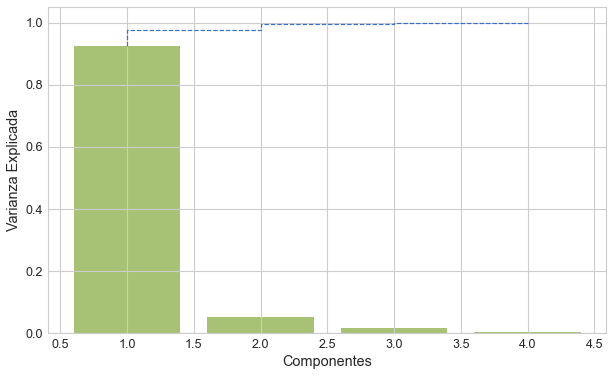

In [266]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.bar(np.arange(1, len(vals) + 1), pca.explained_variance_ratio_, color = 'g', alpha = 0.7)
ax.step(np.arange(1, len(vals) + 1), np.cumsum(pca.explained_variance_ratio_), linestyle = '--')
ax.set_xlabel('Componentes')
ax.set_ylabel('Varianza Explicada');

In [267]:
pca = PCA(n_components=2)

In [268]:
pca.fit(X)

PCA(n_components=2)

In [269]:
newX2 = pca.transform(X)

In [270]:
newX2

array([[-2.68420713,  0.32660731],
       [-2.71539062, -0.16955685],
       [-2.88981954, -0.13734561],
       [-2.7464372 , -0.31112432],
       [-2.72859298,  0.33392456],
       [-2.27989736,  0.74778271],
       [-2.82089068, -0.08210451],
       [-2.62648199,  0.17040535],
       [-2.88795857, -0.57079803],
       [-2.67384469, -0.1066917 ],
       [-2.50652679,  0.65193501],
       [-2.61314272,  0.02152063],
       [-2.78743398, -0.22774019],
       [-3.22520045, -0.50327991],
       [-2.64354322,  1.1861949 ],
       [-2.38386932,  1.34475434],
       [-2.6225262 ,  0.81808967],
       [-2.64832273,  0.31913667],
       [-2.19907796,  0.87924409],
       [-2.58734619,  0.52047364],
       [-2.3105317 ,  0.39786782],
       [-2.54323491,  0.44003175],
       [-3.21585769,  0.14161557],
       [-2.30312854,  0.10552268],
       [-2.35617109, -0.03120959],
       [-2.50791723, -0.13905634],
       [-2.469056  ,  0.13788731],
       [-2.56239095,  0.37468456],
       [-2.63982127,

In [271]:
newX2 = np.column_stack([newX2, y])

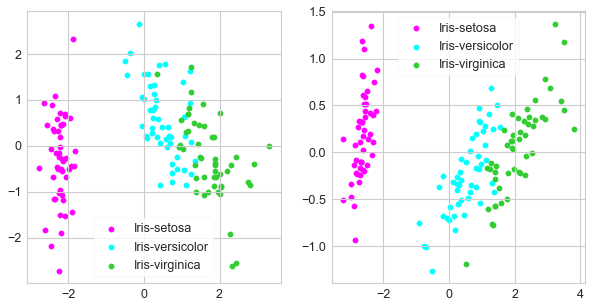

In [272]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))

for f, c in zip(y.unique(), colors):
    mask = newX[:, 2] == f
    ax[0].scatter(newX[mask, 0], newX[mask, 1], color = c, label = f)
    
for f, c in zip(y.unique(), colors):
    mask = newX2[:, 2] == f
    ax[1].scatter(newX2[mask, 0], newX2[mask, 1], color = c, label = f)
    
ax[0].legend()
ax[1].legend();

In [273]:
-B

array([[-0.52237162,  0.37231836],
       [ 0.26335492,  0.92555649],
       [-0.58125401,  0.02109478],
       [-0.56561105,  0.06541577]])

Y ¡ya está!. Hemos conseguido reducir el conjunto de datos de trabajo inicial a un conjunto de datos de dos dimensiones que aun así conserva la información más esencial. de forma que nos resultará mucho más sencillo el trabajo de crear un modelo de clasificación a partir de estos datos. Como ya indicamos anteriormente, es una técnica muy frecuente, ya que es sencilla y facilita mucho el trabajo posterior.

[Regresar al contenido](#Contenido)

<hr>
<h2>Ejercicio</h2>

En los modelos de ML es muy importante usar como variables predictoras aquellas que tengan una baja correlación entre ellas, y ahí es donde entra PCA en nuestro análisis.

La siguiente línea importa un data set que contiene información sobre el estatus socioeconómico de diferentes países.

In [387]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#read data
data = pd.read_csv('Country-data.csv')
data.set_index('country', inplace = True)
data.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


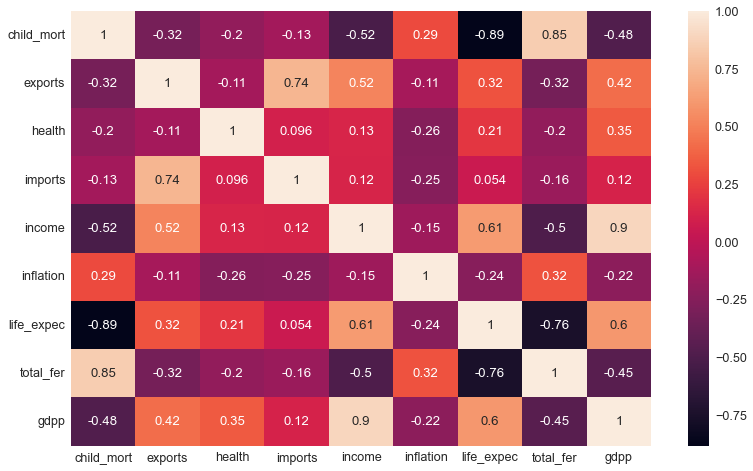

In [388]:
fig, ax = plt.subplots(figsize = (13, 8))

sns.heatmap(data.corr(), ax = ax, annot = True);

Como se puede observar en la matriz de correlación tenemos varias variables (columnas) con una alta correlación.

- Haga una inspección y limpieza general del DataFrame (NaN's y outliers)
- Aplique PCA para encontrar las componentes principales del DataFrame
    - Utilice el criterio de la varianza explicada para conocer el número de componentes
    
- Grafique la matriz de covarianza de las componentes principales para corroborar que las componentes que obtuvimos tienen poca correlación entre ellas.

In [326]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0+ KB


In [327]:
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [390]:
data.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
       ...
       'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay',
       'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia'],
      dtype='object', name='country', length=167)

In [391]:
df = data.reset_index()
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [392]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [393]:
A=df[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

In [394]:
B=df['country']

In [395]:
mask = A['child_mort'].isnull()
A[mask]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp


In [396]:
from sklearn.decomposition import PCA

In [397]:
pca = PCA()

In [398]:
pca.fit(A)

PCA()

In [399]:
pca.explained_variance_ratio_

array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

In [400]:
vals=np.array([9.47923065e-01, 5.20734600e-02, 1.76794667e-06, 1.38689143e-06,
       1.90998382e-07, 1.03865256e-07, 1.82060941e-08, 5.98917170e-09,
       8.64921244e-10])

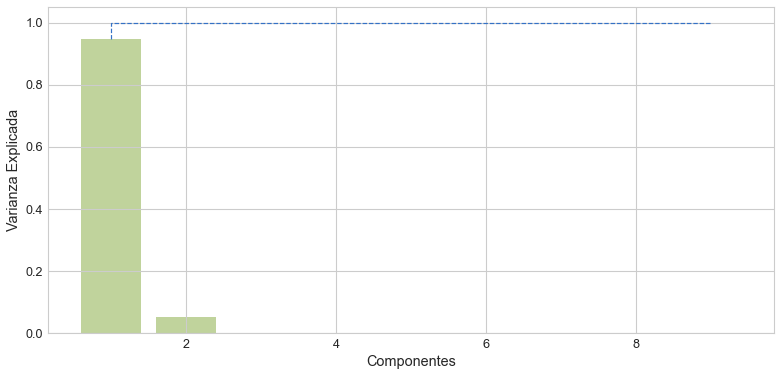

In [401]:
fig, ax = plt.subplots(figsize = (13, 6))

ax.bar(np.arange(1, len(vals) + 1), pca.explained_variance_ratio_, color = 'g', alpha = 0.5)
ax.step(np.arange(1, len(vals) + 1), np.cumsum(pca.explained_variance_ratio_), linestyle = '--')
ax.set_xlabel('Componentes')
ax.set_ylabel('Varianza Explicada');

In [402]:
pca = PCA(n_components=2)

In [403]:
pca.fit(A)

PCA(n_components=2)

In [411]:
newX3 = pca.transform(A)

In [412]:
newX3

array([[-1.98151280e+04, -1.65112472e+03],
       [-1.13389390e+04,  1.49346903e+03],
       [-8.92635259e+03,  3.26468410e+03],
       [-1.46524659e+04, -8.67795270e+02],
       [ 8.96142032e+02,  1.89847815e+03],
       [-6.99699306e+02,  3.00451171e+03],
       [-1.42839444e+04, -9.29672241e+01],
       [ 4.43727025e+04, -1.16354527e+04],
       [ 4.22463421e+04, -6.76525844e+03],
       [-5.72551309e+03,  4.39118182e+03],
       [ 1.45108648e+04, -6.97390702e+03],
       [ 2.27232733e+04,  1.08330393e+04],
       [-1.90710762e+04, -1.22994979e+03],
       [ 7.44735254e+02, -3.47340570e+03],
       [-5.44962091e+03,  4.39049953e+03],
       [ 3.90029276e+04, -6.39086337e+03],
       [-1.26570298e+04, -9.63440942e+01],
       [-1.95217046e+04, -1.65585861e+03],
       [-1.52018204e+04,  4.70524185e+02],
       [-1.60732239e+04, -7.79039217e+01],
       [-1.11343558e+04,  9.71315924e+02],
       [-7.33742276e+03,  2.16588186e+03],
       [-3.13382968e+03, -5.34572278e+02],
       [ 6.

In [418]:
newX3 = np.column_stack([newX3,B])

In [419]:
newX3

array([[-19815.128017778923, -1651.1247204294468, 'Afghanistan'],
       [-11338.93899184548, 1493.469027644981, 'Albania'],
       [-8926.352589162312, 3264.6841016739772, 'Algeria'],
       [-14652.465936549776, -867.7952695618142, 'Angola'],
       [896.1420320177976, 1898.4781514341155, 'Antigua and Barbuda'],
       [-699.699306341415, 3004.5117114450113, 'Argentina'],
       [-14283.944388471597, -92.96722413573207, 'Armenia'],
       [44372.70251424711, -11635.45271878023, 'Australia'],
       [42246.342148552445, -6765.258442554383, 'Austria'],
       [-5725.513088616047, 4391.1818226903215, 'Azerbaijan'],
       [14510.864808514514, -6973.907023510697, 'Bahamas'],
       [22723.273343124467, 10833.039295348342, 'Bahrain'],
       [-19071.076155436418, -1229.9497886317622, 'Bangladesh'],
       [744.7352536452083, -3473.405704313133, 'Barbados'],
       [-5449.620911632077, 4390.499531582856, 'Belarus'],
       [39002.92756398523, -6390.863366072688, 'Belgium'],
       [-12657.

In [376]:
colors = ['magenta', 'cyan']

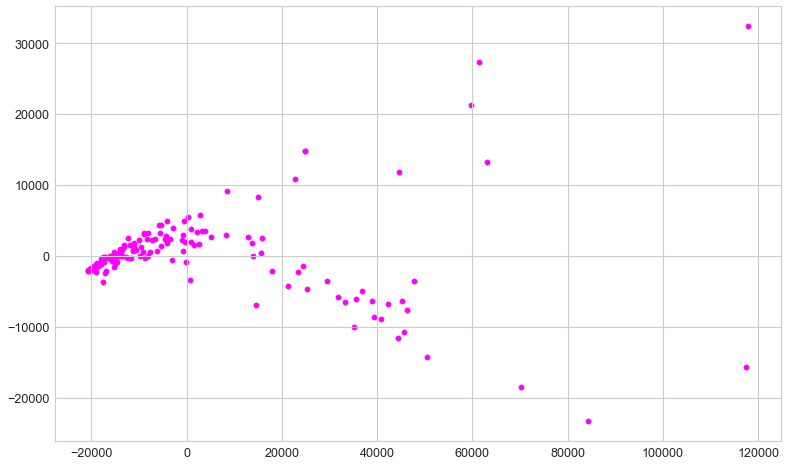

In [427]:
fig, ax = plt.subplots(figsize = (13, 8))

for f in zip(y.unique()):
    mask = newX3[:, 2] == f
    ax.scatter(newX3[mask, 0], newX3[mask, 1], color = 'magenta', label = f)


[Regresar al contenido](#Contenido)